In [1]:
import pandas_ta as ta
print(ta.version)


0.3.14b0


In [2]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta

# 確保所有庫正確安裝並運行
yf.pdr_override()

# 獲取股票數據
tsmc = yf.download("2330.TW", start="2023-01-01", end="2023-06-21")

# 計算RSI指標
rsi = ta.rsi(tsmc['Close'])

# 計算MACD指標
macd = ta.macd(tsmc['Close'])

# 其他指標如SMA、EMA、ATR等都可以在這個庫中找到相應的函數


yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


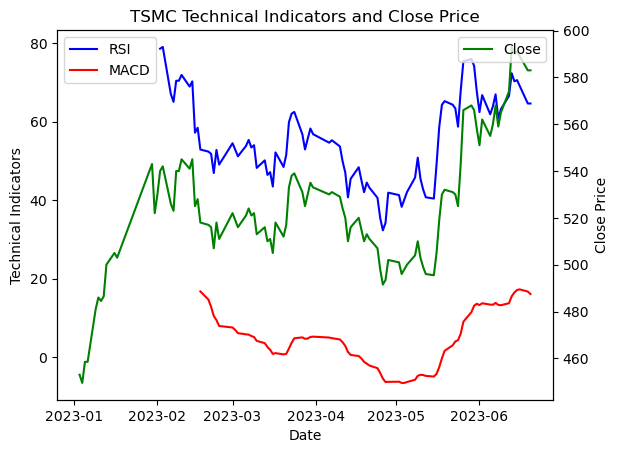

In [4]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt

# 確保 yfinance 的 override 正確運行
yf.pdr_override()

# 定義股票代碼和資料時間範圍
stock_code = "2330.TW"
start_date = "2023-01-01"
end_date = "2023-06-21"

# 獲取台積電股票數據
tsmc = yf.download(stock_code, start=start_date, end=end_date)

# 計算技術指標，例如 RSI 和 MACD
rsi = ta.rsi(tsmc['Close'])
macd = ta.macd(tsmc['Close'])

# 將 RSI 和 MACD 添加到 DataFrame
tsmc['RSI'] = rsi
tsmc[['MACD', 'MACD_Signal', 'MACD_Hist']] = macd[['MACD_12_26_9', 'MACDs_12_26_9', 'MACDh_12_26_9']]

# 繪製技術指標和收盤價
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(tsmc.index, tsmc['RSI'], label='RSI', color='blue')
ax1.plot(tsmc.index, tsmc['MACD'], label='MACD', color='red')
ax2.plot(tsmc.index, tsmc['Close'], label='Close', color='green')

ax1.set_xlabel('Date')
ax1.set_ylabel('Technical Indicators')
ax2.set_ylabel('Close Price')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('TSMC Technical Indicators and Close Price')
plt.show()
